<a href="https://colab.research.google.com/github/Sethyasto/SDG13-co2-fuel-ml-Sethyasto/blob/main/climate_action_co2_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data & Processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasets/co2-fossil-global/master/global.csv"
df = pd.read_csv(url)
df.head()




,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN


In [9]:
df.info()
df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         260 non-null    int64  
 1   Total        260 non-null    int64  
 2   Gas Fuel     260 non-null    int64  
 3   Liquid Fuel  260 non-null    int64  
 4   Solid Fuel   260 non-null    int64  
 5   Cement       260 non-null    int64  
 6   Gas Flaring  260 non-null    int64  
 7   Per Capita   61 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 16.4 KB


,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
count,260.000000,260.000000,260.00000,260.000000,260.000000,260.000000,260.000000,61.000000
mean,1880.500000,1402.788462,185.20000,495.819231,674.569231,34.161538,13.065385,1.054754
std,75.199734,2253.098527,396.58556,934.308074,868.368580,78.899604,26.311315,0.178630
min,1751.000000,3.000000,0.00000,0.000000,3.000000,0.000000,0.000000,0.640000
25%,1815.750000,12.750000,0.00000,0.000000,12.750000,0.000000,0.000000,0.940000
50%,1880.500000,239.500000,0.00000,3.000000,236.000000,0.000000,0.000000,1.120000
75%,1945.250000,1385.000000,59.50000,279.250000,1023.500000,12.000000,0.000000,1.170000
max,2010.000000,9167.000000,1702.00000,3122.000000,3842.000000,450.000000,110.000000,1.330000


In [11]:
# Keep only rows with known 'Per Capita' values
df = df.dropna(subset=['Per Capita'])

# Define features (input variables) and target (output)
features = ['Total', 'Gas Fuel', 'Liquid Fuel', 'Solid Fuel', 'Cement', 'Gas Flaring']
target = 'Per Capita'

# Prepare inputs and outputs
X = df[features]
y = df[target]


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [13]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)


Mean Absolute Error: 0.012507692307691963
R² Score: 0.9898378254054793


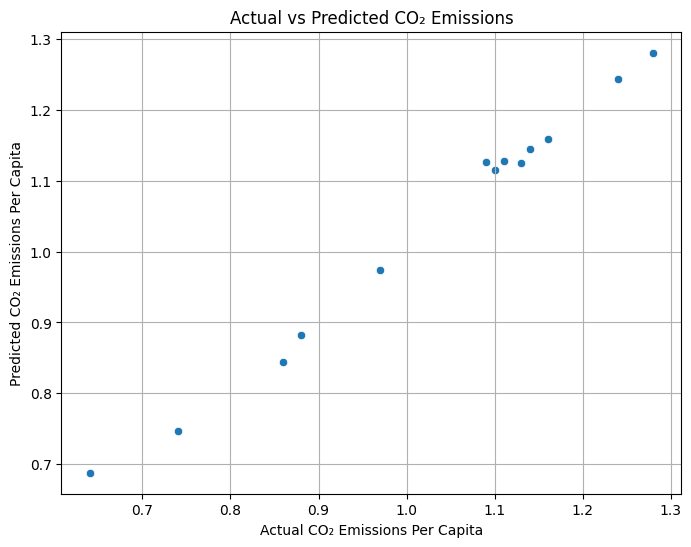

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual CO₂ Emissions Per Capita")
plt.ylabel("Predicted CO₂ Emissions Per Capita")
plt.title("Actual vs Predicted CO₂ Emissions")
plt.grid(True)
plt.show()


### Ethical Reflection

- **Bias**: This dataset contains mostly global aggregates, not individual countries. It may not reflect regional disparities, especially for developing nations.
- **Fairness**: Fuel-based modeling helps highlight which fuels cause the most per-person emissions. This can guide cleaner fuel adoption fairly.
- **Sustainability**: This model supports SDG 13 (Climate Action) by offering insight into which energy sources contribute most to carbon footprints.
